In [89]:
#import necessary libraries for data wrangling and analysis

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.metrics import (mean_squared_error, f1_score)
from sklearn.ensemble import \
     (RandomForestRegressor as RF,
      HistGradientBoostingRegressor as HGBR,
      RandomForestClassifier as RFC,
      HistGradientBoostingClassifier as HGBC)
from sklearn.linear_model import \
      (ElasticNet as EN, SGDRegressor as SGDR, LogisticRegression as LogR)
from sklearn.svm import LinearSVC as LSVC
import warnings
warnings.filterwarnings('ignore')

In [63]:
#Define X and y
X_cols = ['YEAR','AA_TOTAL_year_0',
 'AA_TOTAL_year_1',
 'AA_TOTAL_year_2',
 'AA_TOTAL_CHANGE_year_0',
 'AA_TOTAL_CHANGE_year_1',
 'AA_TOTAL_CHANGE_year_2',
 'BA_TOTAL_year_0',
 'BA_TOTAL_year_1',
 'BA_TOTAL_year_2',
 'BA_TOTAL_CHANGE_year_0',
 'BA_TOTAL_CHANGE_year_1',
 'BA_TOTAL_CHANGE_year_2',
 'BIRTHS_year_0',
 'BIRTHS_year_1',
 'BIRTHS_year_2',
 'BIRTHS_CHANGE_year_0',
 'BIRTHS_CHANGE_year_1',
 'BIRTHS_CHANGE_year_2',
 'DEATHS_year_0',
 'DEATHS_year_1',
 'DEATHS_year_2',
 'DEATHS_CHANGE_year_0',
 'DEATHS_CHANGE_year_1',
 'DEATHS_CHANGE_year_2',
 'DOMESTICMIG_year_0',
 'DOMESTICMIG_year_1',
 'DOMESTICMIG_year_2',
 'DOMESTICMIG_CHANGE_year_0',
 'DOMESTICMIG_CHANGE_year_1',
 'DOMESTICMIG_CHANGE_year_2',
 'H_TOTAL_year_0',
 'H_TOTAL_year_1',
 'H_TOTAL_year_2',
 'H_TOTAL_CHANGE_year_0',
 'H_TOTAL_CHANGE_year_1',
 'H_TOTAL_CHANGE_year_2',
 'IA_TOTAL_year_0',
 'IA_TOTAL_year_1',
 'IA_TOTAL_year_2',
 'IA_TOTAL_CHANGE_year_0',
 'IA_TOTAL_CHANGE_year_1',
 'IA_TOTAL_CHANGE_year_2',
 'INTERNATIONALMIG_year_0',
 'INTERNATIONALMIG_year_1',
 'INTERNATIONALMIG_year_2',
 'INTERNATIONALMIG_CHANGE_year_0',
 'INTERNATIONALMIG_CHANGE_year_1',
 'INTERNATIONALMIG_CHANGE_year_2',
 'NA_TOTAL_year_0',
 'NA_TOTAL_year_1',
 'NA_TOTAL_year_2',
 'NA_TOTAL_CHANGE_year_0',
 'NA_TOTAL_CHANGE_year_1',
 'NA_TOTAL_CHANGE_year_2',
 'NH_TOTAL_year_0',
 'NH_TOTAL_year_1',
 'NH_TOTAL_year_2',
 'NH_TOTAL_CHANGE_year_0',
 'NH_TOTAL_CHANGE_year_1',
 'NH_TOTAL_CHANGE_year_2',
 'NPOPCHG_year_0',
 'NPOPCHG_year_1',
 'NPOPCHG_year_2',
 'NPOPCHG_CHANGE_year_0',
 'NPOPCHG_CHANGE_year_1',
 'NPOPCHG_CHANGE_year_2',
 'POPESTIMATE_year_0',
 'POPESTIMATE_year_1',
 'POPESTIMATE_year_2',
 'POPESTIMATE_CHANGE_year_0',
 'POPESTIMATE_CHANGE_year_1',
 'POPESTIMATE_CHANGE_year_2',
 'RBIRTH_year_0',
 'RBIRTH_year_1',
 'RBIRTH_year_2',
 'RBIRTH_CHANGE_year_0',
 'RBIRTH_CHANGE_year_1',
 'RBIRTH_CHANGE_year_2',
 'RDEATH_year_0',
 'RDEATH_year_1',
 'RDEATH_year_2',
 'RDEATH_CHANGE_year_0',
 'RDEATH_CHANGE_year_1',
 'RDEATH_CHANGE_year_2',
 'RDOMESTICMIG_year_0',
 'RDOMESTICMIG_year_1',
 'RDOMESTICMIG_year_2',
 'RDOMESTICMIG_CHANGE_year_0',
 'RDOMESTICMIG_CHANGE_year_1',
 'RDOMESTICMIG_CHANGE_year_2',
 'RINTERNATIONALMIG_year_0',
 'RINTERNATIONALMIG_year_1',
 'RINTERNATIONALMIG_year_2',
 'RINTERNATIONALMIG_CHANGE_year_0',
 'RINTERNATIONALMIG_CHANGE_year_1',
 'RINTERNATIONALMIG_CHANGE_year_2',
 'TOM_TOTAL_year_0',
 'TOM_TOTAL_year_1',
 'TOM_TOTAL_year_2',
 'TOM_TOTAL_CHANGE_year_0',
 'TOM_TOTAL_CHANGE_year_1',
 'TOM_TOTAL_CHANGE_year_2',
 'TOT_FEMALE_year_0',
 'TOT_FEMALE_year_1',
 'TOT_FEMALE_year_2',
 'TOT_FEMALE_CHANGE_year_0',
 'TOT_FEMALE_CHANGE_year_1',
 'TOT_FEMALE_CHANGE_year_2',
 'TOT_MALE_year_0',
 'TOT_MALE_year_1',
 'TOT_MALE_year_2',
 'TOT_MALE_CHANGE_year_0',
 'TOT_MALE_CHANGE_year_1',
 'TOT_MALE_CHANGE_year_2',
 'TOT_POP_year_0',
 'TOT_POP_year_1',
 'TOT_POP_year_2',
 'TOT_POP_CHANGE_year_0',
 'TOT_POP_CHANGE_year_1',
 'TOT_POP_CHANGE_year_2',
 'UR_year_0',
 'UR_year_1',
 'UR_year_2',
 'UR_CHANGE_year_0',
 'UR_CHANGE_year_1',
 'UR_CHANGE_year_2',
 'WA_TOTAL_year_0',
 'WA_TOTAL_year_1',
 'WA_TOTAL_year_2',
 'WA_TOTAL_CHANGE_year_0',
 'WA_TOTAL_CHANGE_year_1',
 'WA_TOTAL_CHANGE_year_2']

y_cols = ['YEAR', 'dem_pct', 'rep_pct', 'democratic_raw_votes', 'republican_raw_votes']

In [64]:
#load data
sen_df = pd.read_csv('senate_county_wide.csv', low_memory=False)

#drop California from analysis because of top 2 primary system
sen_df = sen_df[sen_df['STNAME'] != 'California']

#drop Arkansas in year 2020 because of no democratic votes recorded
sen_df = sen_df[~((sen_df['STNAME'] == 'Arkansas') & (sen_df['YEAR'] == 2020))]

#drop entries with missing values. These are all entries with no senate election in that year
sen_df = sen_df.dropna()

#make sure FIPS is string (first convert to int to get rid of decimals), democratic_raw_votes is int, republican_raw_votes is int, raw_county_vote_totals is int
sen_df['FIPS'] = sen_df['FIPS'].astype(int)
sen_df['FIPS'] = sen_df['FIPS'].astype(str)
sen_df[['democratic_raw_votes', 'republican_raw_votes', 'raw_county_vote_totals']] = sen_df[['democratic_raw_votes', 'republican_raw_votes', 'raw_county_vote_totals']].astype(int)

#create X and y
sen_df_X = sen_df[X_cols]
sen_df_y = sen_df[y_cols]

#create y column for republican win. 1 if rep_pct > dem_pct, 0 otherwise
sen_df_y['rep_win'] = np.where(sen_df_y['rep_pct'] > sen_df_y['dem_pct'], 1, 0)

# Find and drop rows with inf values
inf_rows = np.any(np.isinf(sen_df_X), axis=1)
sen_df_X = sen_df_X[~inf_rows]
sen_df_y = sen_df_y[~inf_rows]

In [65]:
#Split data into various years. 2022 is test set, all other various combinations are training sets
X_2016 = sen_df_X[sen_df_X['YEAR'] == 2016]
y_2016 = sen_df_y[sen_df_y['YEAR'] == 2016]

X_2018 = sen_df_X[sen_df_X['YEAR'] == 2018]
y_2018 = sen_df_y[sen_df_y['YEAR'] == 2018]

X_2020 = sen_df_X[sen_df_X['YEAR'] == 2020]
y_2020 = sen_df_y[sen_df_y['YEAR'] == 2020]

X_2020_2018 = sen_df_X[sen_df_X['YEAR'].isin([2018, 2020])]
y_2020_2018 = sen_df_y[sen_df_y['YEAR'].isin([2018, 2020])]

X_2020_2016 = sen_df_X[sen_df_X['YEAR'].isin([2016, 2018, 2020])]
y_2020_2016 = sen_df_y[sen_df_y['YEAR'].isin([2016, 2018, 2020])]

X_2022 = sen_df_X[sen_df_X['YEAR'] == 2022]
y_2022 = sen_df_y[sen_df_y['YEAR'] == 2022]

#reset index for all dataframes
X_2016 = X_2016.reset_index(drop=True)
y_2016 = y_2016.reset_index(drop=True)

X_2018 = X_2018.reset_index(drop=True)
y_2018 = y_2018.reset_index(drop=True)

X_2020 = X_2020.reset_index(drop=True)
y_2020 = y_2020.reset_index(drop=True)

X_2020_2018 = X_2020_2018.reset_index(drop=True)
y_2020_2018 = y_2020_2018.reset_index(drop=True)

X_2020_2016 = X_2020_2016.reset_index(drop=True)
y_2020_2016 = y_2020_2016.reset_index(drop=True)

X_2022 = X_2022.reset_index(drop=True)
y_2022 = y_2022.reset_index(drop=True)


In [66]:
#drop year column from all dataframes
X_2016 = X_2016.drop(columns=['YEAR'])
y_2016 = y_2016.drop(columns=['YEAR'])

X_2018 = X_2018.drop(columns=['YEAR'])
y_2018 = y_2018.drop(columns=['YEAR'])

X_2020 = X_2020.drop(columns=['YEAR'])
y_2020 = y_2020.drop(columns=['YEAR'])

X_2020_2018 = X_2020_2018.drop(columns=['YEAR'])
y_2020_2018 = y_2020_2018.drop(columns=['YEAR'])

X_2020_2016 = X_2020_2016.drop(columns=['YEAR'])
y_2020_2016 = y_2020_2016.drop(columns=['YEAR'])

X_2022 = X_2022.drop(columns=['YEAR'])
y_2022 = y_2022.drop(columns=['YEAR'])


In [67]:
#Create list of all dataframes except 2022. This will be used to iterate through all dataframes. For y, only include rep_pct. For dfs_test_class, use 'rep_win'. Name each dataframe as a tuple
dfs_train = [
    {"X": X_2016, "y": y_2016['rep_pct'], "name": "2016"},
    {"X": X_2018, "y": y_2018['rep_pct'], "name": "2018"},
    {"X": X_2020, "y": y_2020['rep_pct'], "name": "2020"},
    {"X": X_2020_2018, "y": y_2020_2018['rep_pct'], "name": "2020, 2018"},
    {"X": X_2020_2016, "y": y_2020_2016['rep_pct'], "name": "2020, 2018, 2016"},
]
dfs_test = (X_2022, y_2022['rep_pct'])

dfs_train_class = [
    {"X": X_2016, "y": y_2016['rep_win'], "name": "2016"},
    {"X": X_2018, "y": y_2018['rep_win'], "name": "2018"},
    {"X": X_2020, "y": y_2020['rep_win'], "name": "2020"},
    {"X": X_2020_2018, "y": y_2020_2018['rep_win'], "name": "2020, 2018"},
    {"X": X_2020_2016, "y": y_2020_2016['rep_win'], "name": "2020, 2018, 2016"},
]
dfs_test_class = (X_2022, y_2022['rep_win'])

In [68]:
#Write function to evaluate model performance for all dataframes using grid search

def evaluate_model_grid(model_pipeline, param_grid, data_train, data_test):
    """
    Evaluates a model using cross-validated grid search on multiple datasets.

    Parameters:
    model_pipeline (Pipeline): The scikit-learn pipeline object.
    param_grid (dict): Dictionary with parameters names (str) as keys and lists of parameter settings to try as values.
    data_train (list of dict): List of training datasets with keys 'name', 'X', and 'y'.
    data_test (tuple): A tuple containing the test features and labels as arrays.

    Returns:
    pd.DataFrame: Training errors with dataset names.
    pd.DataFrame: Test errors with dataset names.
    pd.DataFrame: Best parameters with dataset names.
    pd.DataFrame: Best models with dataset names.
    """
    
    train_errors = []
    test_errors = []
    best_params_list = []
    best_models_list = []

    X_test, y_test = data_test
    dataset_names = [data["name"] for data in data_train]

    for i, data in enumerate(data_train):
        X_train = data["X"]
        y_train = data["y"]

        # Perform hyperparameter tuning using GridSearchCV with parallel execution
        grid_search = GridSearchCV(model_pipeline, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1, refit=True)
        grid_search.fit(X_train, y_train)

        # Get the best hyperparameters and the refitted best model
        best_params = grid_search.best_params_
        best_params_list.append(best_params)
        
        # Get the best model and add it to the list
        best_model = grid_search.best_estimator_
        best_models_list.append(best_model)

        # Evaluate the model on the training set and record the training error
        y_train_pred = best_model.predict(X_train)
        train_error = mean_squared_error(y_train, y_train_pred)
        train_errors.append(train_error)

        # Evaluate the model on the test set and record the test error
        y_test_pred = best_model.predict(X_test)
        test_error = mean_squared_error(y_test, y_test_pred)
        test_errors.append(test_error)
        
    # Create dataframes for the results
    train_errors_df = pd.DataFrame({'Years': dataset_names, 'Train_Error': train_errors})
    test_errors_df = pd.DataFrame({'Years': dataset_names, 'Test_Error': test_errors})
    best_params_df = pd.DataFrame({'Years': dataset_names, 'Best_Params': best_params_list})
    best_models_df = pd.DataFrame({'Years': dataset_names, 'Best_Model': best_models_list})
       
    return train_errors_df, test_errors_df, best_params_df, best_models_df

In [69]:
#Elasitc Net pipeline
l1_ratios = np.linspace(0.01, 1.0, 25)
alpha = np.logspace(-3, 3, 25)
scaler = StandardScaler()
elastic = EN(random_state=323)
pipe_net = make_pipeline(scaler, elastic)

In [70]:
#use Elastic Net pipeline on all dataframes with grid search
param_grid = {'elasticnet__l1_ratio': l1_ratios, 'elasticnet__alpha': alpha}
train_errors_net, test_errors_net, best_params_net, best_models_net = evaluate_model_grid(pipe_net, param_grid, dfs_train, dfs_test)

In [71]:
#Random Forest pipeline
params = {'randomforestregressor__n_estimators': [10, 20, 30, 40, 50, 100], 
    'randomforestregressor__max_depth': [2, 4, 6, 8, 10, 12]
}
rf = RF(random_state=323)
pipe_rf = make_pipeline(scaler, rf)

In [72]:
#use Random Forest pipeline on all dataframes with grid search
train_errors_rf, test_errors_rf, best_params_rf, best_models_rf = evaluate_model_grid(pipe_rf, params, dfs_train, dfs_test)

In [73]:
#Histogram Gradient Boosting pipeline
params = {'histgradientboostingregressor__learning_rate': [0.01, 0.1, 0.5, 1.0],
    'histgradientboostingregressor__max_depth': [2, 4, 6, 8, 10, 12]
}
hgb = HGBR(random_state=323)
pipe_hgb = make_pipeline(scaler, hgb)

In [74]:
#use Histogram Gradient Boosting pipeline on all dataframes with grid search
train_errors_hgb, test_errors_hgb, best_params_hgb, best_models_hgb = evaluate_model_grid(pipe_hgb, params, dfs_train, dfs_test)

In [75]:
#Stochastic Gradient Descent pipeline
params = {'sgdregressor__alpha': np.logspace(-3, 3, 25),
    'sgdregressor__penalty': ['l1', 'l2', 'elasticnet']
}
sgd = SGDR(random_state=323)
pipe_sgd = make_pipeline(scaler, sgd)

In [76]:
#use Stochastic Gradient Descent (Support Vector Regression) pipeline on all dataframes with grid search
train_errors_sgd, test_errors_sgd, best_params_sgd, best_models_sgd = evaluate_model_grid(pipe_sgd, params, dfs_train, dfs_test_class)

In [77]:
# Merge all train and test errors into one dataframe.

#first, rename error columns to include model name
train_errors_net = train_errors_net.rename(columns={'Train_Error': 'Elastic Net'})
train_errors_rf = train_errors_rf.rename(columns={'Train_Error': 'Random Forest'})
train_errors_hgb = train_errors_hgb.rename(columns={'Train_Error': 'Histogram Gradient Boosting'})
train_errors_sgd = train_errors_sgd.rename(columns={'Train_Error': 'Stochastic Gradient Descent'})

test_errors_net = test_errors_net.rename(columns={'Test_Error': 'Elastic Net'})
test_errors_rf = test_errors_rf.rename(columns={'Test_Error': 'Random Forest'})
test_errors_hgb = test_errors_hgb.rename(columns={'Test_Error': 'Histogram Gradient Boosting'})
test_errors_sgd = test_errors_sgd.rename(columns={'Test_Error': 'Stochastic Gradient Descent'})

#merge test and train errors
train_errors = pd.merge(train_errors_net, train_errors_rf, on='Years')
train_errors = pd.merge(train_errors, train_errors_hgb, on='Years')
train_errors = pd.merge(train_errors, train_errors_sgd, on='Years')

test_errors = pd.merge(test_errors_net, test_errors_rf, on='Years')
test_errors = pd.merge(test_errors, test_errors_hgb, on='Years')
test_errors = pd.merge(test_errors, test_errors_sgd, on='Years')

#Convert to long format
train_errors = train_errors.melt(id_vars=['Years'], var_name='Model', value_name='Train_Error')
test_errors = test_errors.melt(id_vars=['Years'], var_name='Model', value_name='Test_Error')

#merge train and test errors into one dataframe
errors = pd.merge(train_errors, test_errors, on=['Years', 'Model'])

#convert to long format, again
errors = errors.melt(id_vars=['Years', 'Model'], var_name='Error_Type', value_name='Error')

#sort by years, model, and error type then reset index
errors = errors.sort_values(by=['Years', 'Model', 'Error_Type'])
errors = errors.reset_index(drop=True)


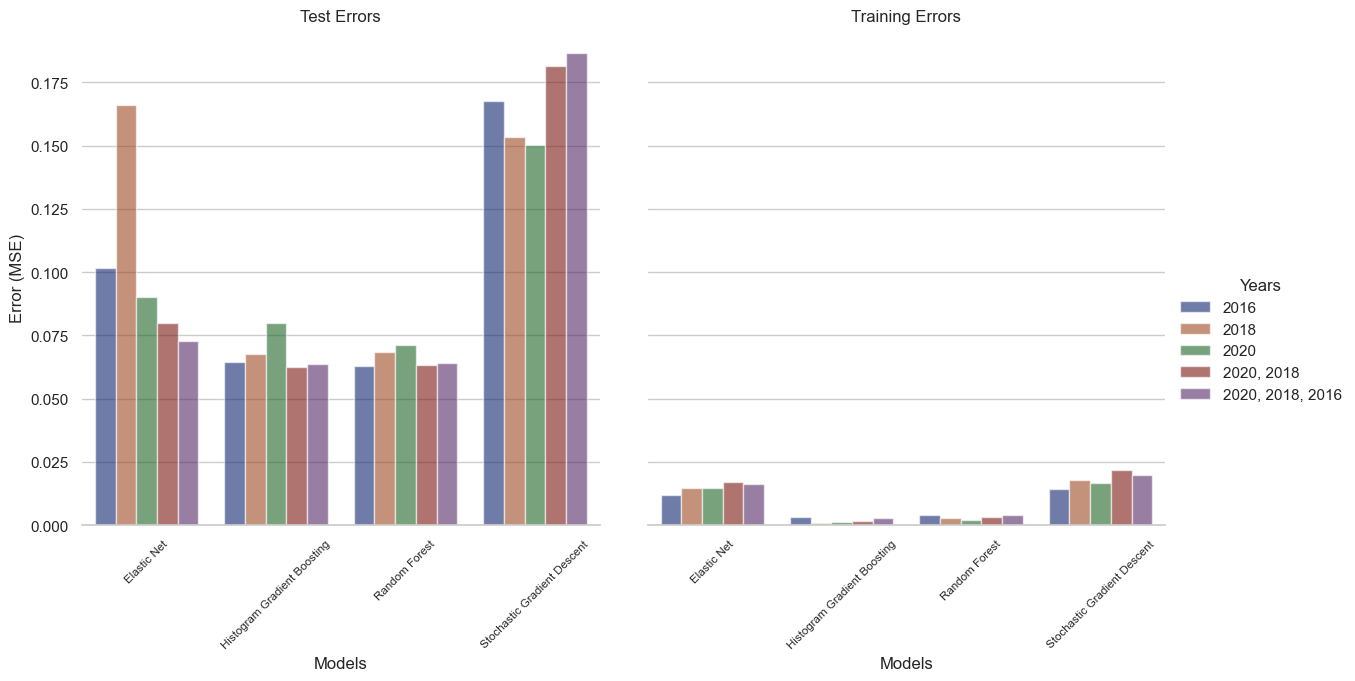

In [78]:
#Create side by side seaborn bar plot of train and test errors. X axis is years, y axis is error, hue is model, col is error type
sns.set_theme(style="whitegrid")
g = sns.catplot(
    data=errors, kind="bar",
    x="Model", y="Error", hue="Years", col="Error_Type",
    errorbar="sd", palette="dark", alpha=.6, height=6
)

# Setting individual titles for each subplot
g.axes[0, 0].set_title('Test Errors')
g.axes[0, 1].set_title('Training Errors')

# Customizing x-tick labels: setting a 45-degree angle and a smaller font size
g.set_xticklabels(rotation=45, fontsize='x-small')

g.despine(left=True)
g.set_axis_labels("Models", "Error (MSE)")
g.legend.set_title("Years")
plt.show()

In [90]:
#Write function to evaluate model performance for all dataframes using grid search for classification

def evaluate_model_class(model_pipeline, param_grid, data_train, data_test):
    """
    Evaluates a model using cross-validated grid search on multiple datasets for binary classification problems.

    Parameters:
    model_pipeline (Pipeline): The scikit-learn pipeline object.
    param_grid (dict): Dictionary with parameters names (str) as keys and lists of parameter settings to try as values.
    data_train (list of dict): List of training datasets with keys 'name', 'X', and 'y'.
    data_test (tuple): A tuple containing the test features and labels as arrays.

    Returns:
    pd.DataFrame: Training errors with dataset names.
    pd.DataFrame: Test errors with dataset names.
    pd.DataFrame: Best parameters with dataset names.
    pd.DataFrame: Best models with dataset names.
    """
    
    train_errors = []
    test_errors = []
    best_params_list = []
    best_models_list = []

    X_test, y_test = data_test
    dataset_names = [data["name"] for data in data_train]

    for i, data in enumerate(data_train):
        X_train = data["X"]
        y_train = data["y"]

        # Perform hyperparameter tuning using GridSearchCV with parallel execution
        grid_search = GridSearchCV(model_pipeline, param_grid, cv=5, scoring='f1', n_jobs=-1, refit=True)
        grid_search.fit(X_train, y_train)

        # Get the best hyperparameters and the refitted best model
        best_params = grid_search.best_params_
        best_params_list.append(best_params)
        
        # Get the best model and add it to the list
        best_model = grid_search.best_estimator_
        best_models_list.append(best_model)

        # Evaluate the model on the training set and record the training error
        y_train_pred = best_model.predict(X_train)
        train_error = f1_score(y_train, y_train_pred)
        train_errors.append(train_error)

        # Evaluate the model on the test set and record the test error
        y_test_pred = best_model.predict(X_test)
        test_error = f1_score(y_test, y_test_pred)
        test_errors.append(test_error)
        
    # Create dataframes for the results
    train_errors_df = pd.DataFrame({'Years': dataset_names, 'Train_Error': train_errors})
    test_errors_df = pd.DataFrame({'Years': dataset_names, 'Test_Error': test_errors})
    best_params_df = pd.DataFrame({'Years': dataset_names, 'Best_Params': best_params_list})
    best_models_df = pd.DataFrame({'Years': dataset_names, 'Best_Model': best_models_list})
       
    return train_errors_df, test_errors_df, best_params_df, best_models_df

In [80]:
#Logistic Regression pipeline
params = {'logisticregression__C': np.logspace(-3, 3, 25),
    'logisticregression__penalty': ['l1', 'l2']
}
logreg = LogR(random_state=323, solver='liblinear')
pipe_logreg = make_pipeline(scaler, logreg)

In [81]:
#use Logistic Regression pipeline on all dataframes with grid search
train_errors_logreg, test_errors_logreg, best_params_logreg, best_models_logreg = evaluate_model_class(pipe_logreg, params, dfs_train_class, dfs_test_class)

In [85]:
#Random Forest Classifier pipeline
params = {'randomforestclassifier__n_estimators': [10, 20, 30, 40, 50, 100],
    'randomforestclassifier__max_depth': [2, 4, 6, 8, 10, 12]
}
rfc = RFC(random_state=323)
pipe_rfc = make_pipeline(scaler, rfc)

#use Random Forest Classifier pipeline on all dataframes with grid search
train_errors_rfc, test_errors_rfc, best_params_rfc, best_models_rfc = evaluate_model_class(pipe_rfc, params, dfs_train_class, dfs_test_class)

#Histogram Gradient Boosting Classifier pipeline
params = {'histgradientboostingclassifier__learning_rate': [0.01, 0.1, 0.5, 1.0],
    'histgradientboostingclassifier__max_depth': [2, 4, 6, 8, 10, 12]
}
hgbc = HGBC(random_state=323)
pipe_hgbc = make_pipeline(scaler, hgbc)

#use Histogram Gradient Boosting Classifier pipeline on all dataframes with grid search
train_errors_hgbc, test_errors_hgbc, best_params_hgbc, best_models_hgbc = evaluate_model_class(pipe_hgbc, params, dfs_train_class, dfs_test_class)

#Linear Support Vector Classifier pipeline
params = {'linearsvc__C': np.logspace(-3, 3, 25),
    'linearsvc__penalty': ['l1', 'l2']
}
lsvc = LSVC(random_state=323, dual=False)
pipe_lsvc = make_pipeline(scaler, lsvc)

#use Linear Support Vector Classifier pipeline on all dataframes with grid search
train_errors_lsvc, test_errors_lsvc, best_params_lsvc, best_models_lsvc = evaluate_model_class(pipe_lsvc, params, dfs_train_class, dfs_test_class)

In [86]:
#Merge all train and test errors into one dataframe.

#first, rename error columns to include model name
train_errors_logreg = train_errors_logreg.rename(columns={'Train_Error': 'Logistic Regression'})
train_errors_rfc = train_errors_rfc.rename(columns={'Train_Error': 'Random Forest'})
train_errors_hgbc = train_errors_hgbc.rename(columns={'Train_Error': 'Histogram Gradient Boosting'})
train_errors_lsvc = train_errors_lsvc.rename(columns={'Train_Error': 'Linear Support Vector Classifier'})

test_errors_logreg = test_errors_logreg.rename(columns={'Test_Error': 'Logistic Regression'})
test_errors_rfc = test_errors_rfc.rename(columns={'Test_Error': 'Random Forest'})
test_errors_hgbc = test_errors_hgbc.rename(columns={'Test_Error': 'Histogram Gradient Boosting'})
test_errors_lsvc = test_errors_lsvc.rename(columns={'Test_Error': 'Linear Support Vector Classifier'})

#merge test and train errors
train_errors_c = pd.merge(train_errors_logreg, train_errors_rfc, on='Years')
train_errors_c = pd.merge(train_errors_c, train_errors_hgbc, on='Years')
train_errors_c = pd.merge(train_errors_c, train_errors_lsvc, on='Years')

test_errors_c = pd.merge(test_errors_logreg, test_errors_rfc, on='Years')
test_errors_c = pd.merge(test_errors_c, test_errors_hgbc, on='Years')
test_errors_c = pd.merge(test_errors_c, test_errors_lsvc, on='Years')

#Convert to long format
train_errors_c = train_errors_c.melt(id_vars=['Years'], var_name='Model', value_name='Train_Error')
test_errors_c = test_errors_c.melt(id_vars=['Years'], var_name='Model', value_name='Test_Error')

#merge train and test errors into one dataframe
errors_c = pd.merge(train_errors_c, test_errors_c, on=['Years', 'Model'])

#convert to long format, again
errors_c = errors_c.melt(id_vars=['Years', 'Model'], var_name='Error_Type', value_name='Error')

#sort by years, model, and error type then reset index
errors_c = errors_c.sort_values(by=['Years', 'Model', 'Error_Type'])
errors_c = errors_c.reset_index(drop=True)


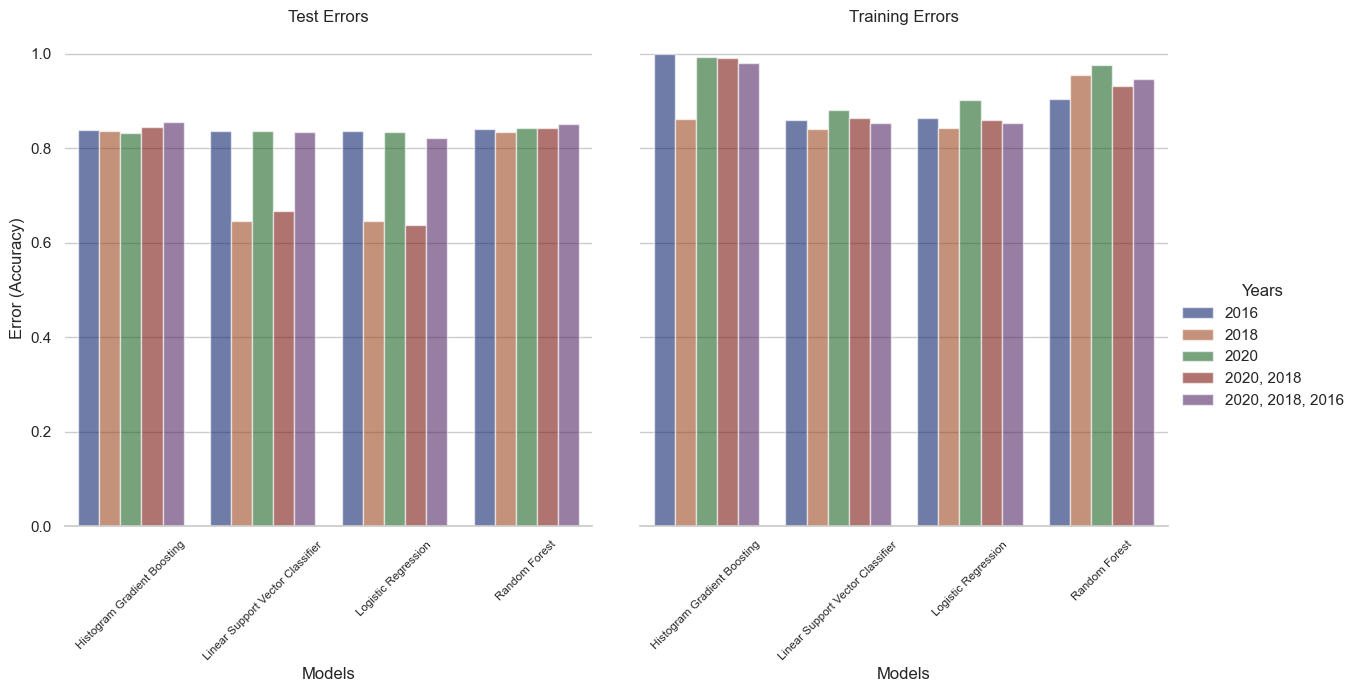

In [87]:
#Create side by side seaborn bar plot of train and test errors. X axis is Model, y axis is error, hue is years, col is error type
sns.set_theme(style="whitegrid")
g = sns.catplot(
    data=errors_c, kind="bar",
    x="Model", y="Error", hue="Years", col="Error_Type",
    errorbar="sd", palette="dark", alpha=.6, height=6
)

# Setting individual titles for each subplot
g.axes[0, 0].set_title('Test Errors')
g.axes[0, 1].set_title('Training Errors')

# Customizing x-tick labels: setting a 45-degree angle and a smaller font size
g.set_xticklabels(rotation=45, fontsize='x-small')

g.despine(left=True)
g.set_axis_labels("Models", "F1 Score")
g.legend.set_title("Years")
plt.show()

In [88]:
#Convert both errors and errors_c to csv files
errors.to_csv('errors.csv', index=False)
errors_c.to_csv('errors_c.csv', index=False)